<a href="https://colab.research.google.com/github/svetazo060510/goit-numpr-hw-04/blob/main/HW4_StremedlovskaS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнє завдання Тема 4

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances, adjusted_rand_score
from sklearn.cluster import AgglomerativeClustering

In [12]:
# Завантажуємо набір даних
cancer = load_breast_cancer()

# Створюємо DataFrame з усіма 30 ознаками
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
true_labels = cancer.target # Реальні діагнози (0: malignant, 1: benign)

print("Набір даних Breast Cancer завантажено.")
print(f"Формат даних: {df.shape} (рядків, ознак)")

Набір даних Breast Cancer завантажено.
Формат даних: (569, 30) (рядків, ознак)


In [13]:
# Вивід загальної інформації про типи та пропуски
print("--- СТРУКТУРА ДАНИХ (df.info) ---")
df.info()

--- СТРУКТУРА ДАНИХ (df.info) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float

In [14]:
# Вивід перших 5 рядків
print("\n--- ПЕРШІ 5 ЗАПИСІВ (df.head) ---")
df.head()


--- ПЕРШІ 5 ЗАПИСІВ (df.head) ---


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
# Вивід опису датасету від sklearn
print("--- ОПИС ДАТАСЕТУ ---")
print(cancer.DESCR[:1500]) # Виводимо перші 1500 символів опису

--- ОПИС ДАТАСЕТУ ---
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is

In [16]:
print("--- ОПИСОВА СТАТИСТИКА (df.describe) ---") # Приклад 1
# Виводимо статистику для перших 10 ознак, щоб таблиця була читабельною
df.iloc[:, :10].describe()

--- ОПИСОВА СТАТИСТИКА (df.describe) ---


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


In [17]:
# Використовуємо .T (транспонування), щоб ознаки стали рядками, а метрики (mean, std) - стовпцями
print("--- ПОВНА ОПИСОВА СТАТИСТИКА ДЛЯ ВСІХ 30 ОЗНАК ---") # Приклад 2
stats = df.describe().T

# Додамо колонку 'range', щоб побачити різницю в масштабах
stats['range'] = stats['max'] - stats['min']

# Виводимо всю таблицю
stats

--- ПОВНА ОПИСОВА СТАТИСТИКА ДЛЯ ВСІХ 30 ОЗНАК ---


,count,mean,std,min,25%,50%,75%,max,range
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000,21.129000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000,29.570000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000,144.710000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000,2357.500000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340,0.110770
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540,0.326020
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680,0.426800
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120,0.201200
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400,0.198000
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744,0.047480


In [18]:
# Перевіряємо, чи є в усьому датасеті пропущені значення
print(f"Загальна кількість пропусків у всьому датасеті: {df.isnull().sum().sum()}")

# Дивимось на діапазон середніх значень по ВСІХ 30 колонках
print(f"Мінімальне середнє значення серед усіх ознак: {df.mean().min():.4f}")
print(f"Максимальне середнє значення серед усіх ознак: {df.mean().max():.4f}")

Загальна кількість пропусків у всьому датасеті: 0
Мінімальне середнє значення серед усіх ознак: 0.0038
Максимальне середнє значення серед усіх ознак: 880.5831


Аналіз describe() показав суттєву різницю в масштабах ознак, що підтверджує необхідність стандартизації для коректного обчислення відстаней.

In [19]:
# Ініціалізуємо стандартизатор
scaler = StandardScaler()

# Обчислюємо та трансформуємо дані
X_scaled = scaler.fit_transform(df)

# Створюємо новий DataFrame для стандартизованих даних
df_scaled = pd.DataFrame(X_scaled, columns=df.columns)

print("Стандартизація завершена.")
print("\n--- Перевірка: Описова статистика після стандартизації (перші 5 ознак) ---")
df_scaled.iloc[:, :5].describe().round(2) # Значення mean мають бути ~0, а std ~1

Стандартизація завершена.

--- Перевірка: Описова статистика після стандартизації (перші 5 ознак) ---


,mean radius,mean texture,mean perimeter,mean area,mean smoothness
count,569.00,569.00,569.00,569.00,569.00
mean,-0.00,-0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00
min,-2.03,-2.23,-1.98,-1.45,-3.11
25%,-0.69,-0.73,-0.69,-0.67,-0.71
50%,-0.22,-0.10,-0.24,-0.30,-0.03
75%,0.47,0.58,0.50,0.36,0.64
max,3.97,4.65,3.98,5.25,4.77


In [25]:
# Обчислюємо кореляцію всіх ознак з цільовою змінною (target)
# Створюємо тимчасовий DataFrame для аналізу кореляції
correlation_analysis = df.copy()
correlation_analysis['target'] = true_labels

# Рахуємо кореляцію Пірсона
correlations = correlation_analysis.corr()['target'].drop('target')

# Беремо модуль (абсолютне значення), бо нам важлива сила зв'язку, а не напрямок
top_correlations = correlations.abs().sort_values(ascending=False)

# Вибираємо топ-5 найбільш значущих ознак
top_5_features = top_correlations.head(5).index.tolist()

print("--- Топ-5 ознак за кореляцією з діагнозом ---")
for feature in top_5_features:
    print(f"{feature}: {correlations[feature]:.4f}")

--- Топ-5 ознак за кореляцією з діагнозом ---
worst concave points: -0.7936
worst perimeter: -0.7829
mean concave points: -0.7766
worst radius: -0.7765
mean perimeter: -0.7426



Побудова точкових діаграм для найбільш значущих ознак...


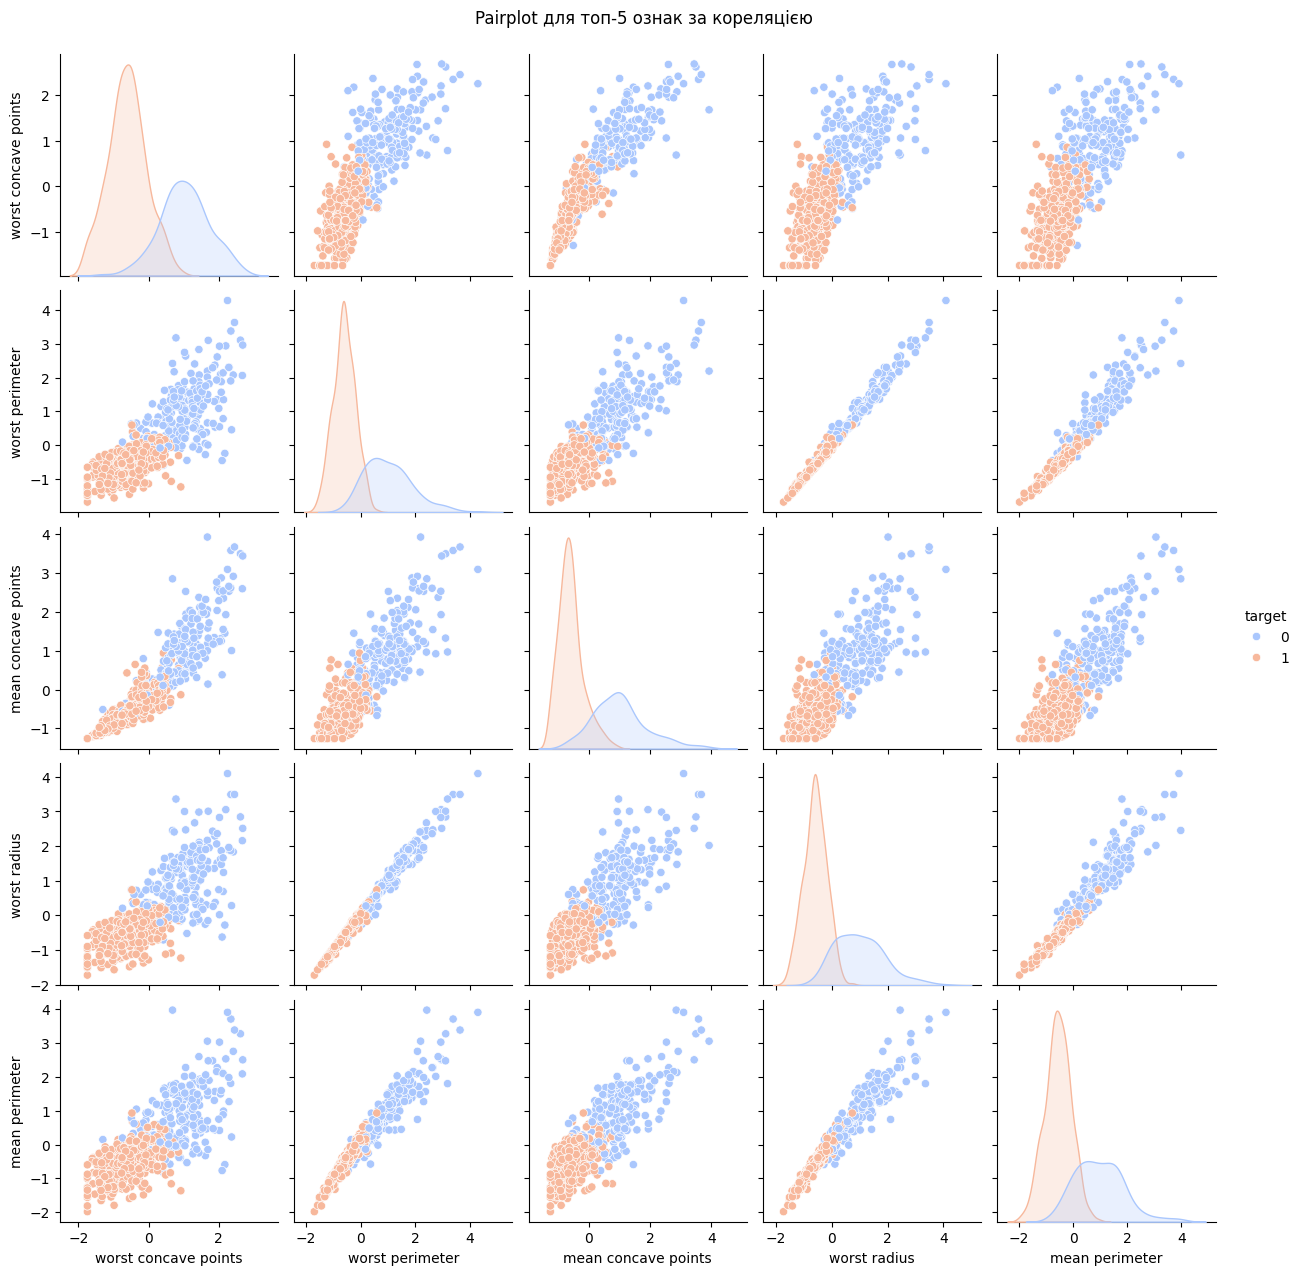

In [31]:
# Побудова pairplot для цих топ-5 ознак
plot_data = df_scaled[top_5_features].copy()
plot_data['target'] = true_labels

print("\nПобудова точкових діаграм для найбільш значущих ознак...")
sns.pairplot(plot_data, hue='target', palette='coolwarm', diag_kind='kde', height=2.5)
plt.suptitle(f"Pairplot для топ-5 ознак за кореляцією", y=1.02)
plt.show()

Для візуалізації було відібрано 5 ознак з найвищою кореляцією до цільової змінної. На графіках чітко видно, що дані підлягають для подальшої кластеризації.

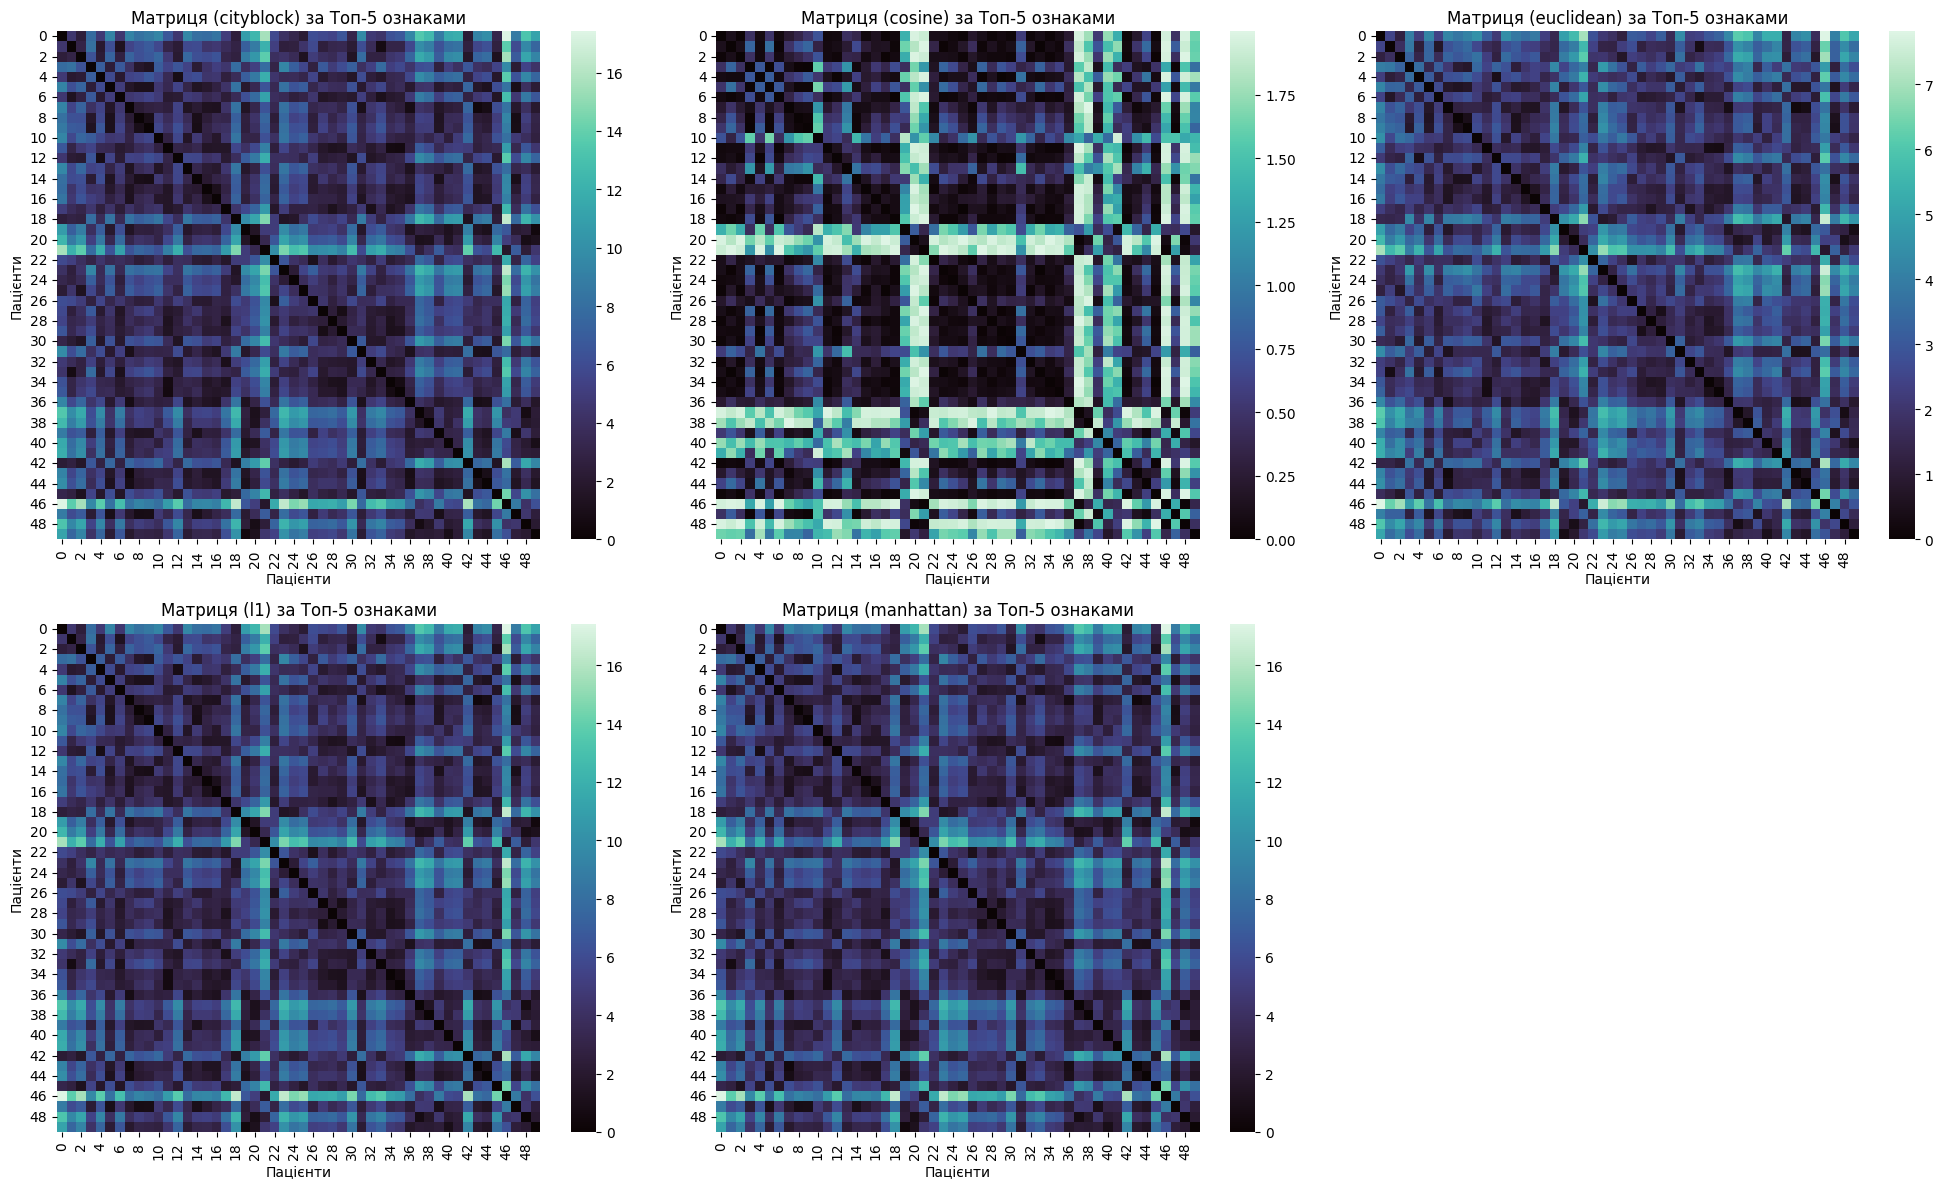

Матриці побудовані на основі ознак: worst concave points, worst perimeter, mean concave points, worst radius, mean perimeter


In [29]:
# Використовуємо список топ_5_features, який ми створили раніше
data_top_5 = df_scaled[top_5_features]

# Список усіх метрик
metrics_list = ['cityblock', 'cosine', 'euclidean', 'l1', 'manhattan']

# Візьмемо 50 зразків для наочності теплокарти
samples_to_show = 50
data_subset = data_top_5.iloc[:samples_to_show]

plt.figure(figsize=(20, 12))

for i, metric in enumerate(metrics_list, 1):
    # Обчислюємо матрицю відстаней
    dist_matrix = pairwise_distances(data_subset, metric=metric)

    plt.subplot(2, 3, i)
    sns.heatmap(dist_matrix, cmap='mako')
    plt.title(f"Матриця ({metric}) за Топ-5 ознаками")
    plt.xlabel("Пацієнти")
    plt.ylabel("Пацієнти")

plt.tight_layout()
plt.show()

print(f"Матриці побудовані на основі ознак: {', '.join(top_5_features)}")

ARI для кожної метрики (на базі Топ-5 ознак):
Метрика cityblock  | ARI Score: 0.4204
Метрика cosine     | ARI Score: 0.7621
Метрика euclidean  | ARI Score: 0.3677
Метрика l1         | ARI Score: 0.4204
Метрика manhattan  | ARI Score: 0.4204


/tmp/ipython-input-3991230140.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(ari_results.keys()), y=list(ari_results.values()), palette='viridis')


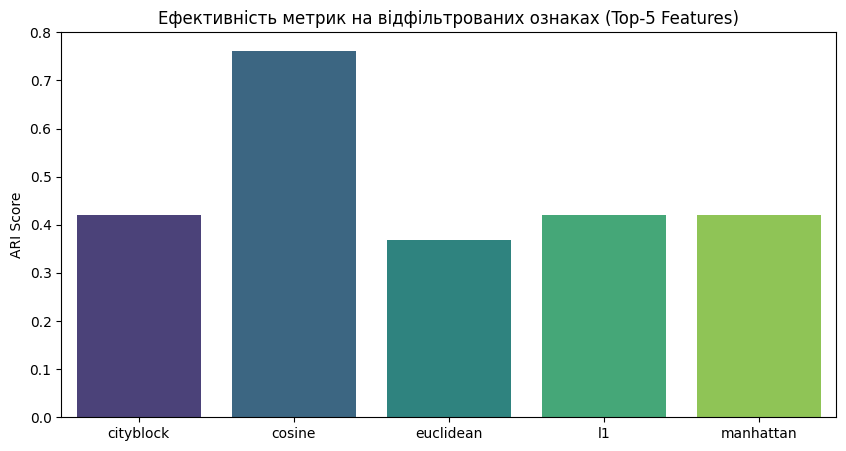

In [30]:
ari_results = {}

print("ARI для кожної метрики (на базі Топ-5 ознак):")
for metric in metrics_list:
    # Обчислюємо відстані для всього набору даних (тільки 5 ознак)
    dist = pairwise_distances(data_top_5, metric=metric)

    # Кластеризація
    model = AgglomerativeClustering(n_clusters=2, metric='precomputed', linkage='average')
    pred_labels = model.fit_predict(dist)

    # Оцінка
    ari = adjusted_rand_score(true_labels, pred_labels)
    ari_results[metric] = ari
    print(f"Метрика {metric:<10} | ARI Score: {ari:.4f}")

# Візуалізація результатів
plt.figure(figsize=(10, 5))
sns.barplot(x=list(ari_results.keys()), y=list(ari_results.values()), palette='viridis')
plt.title("Ефективність метрик на відфільтрованих ознаках (Top-5 Features)")
plt.ylabel("ARI Score")
plt.show()

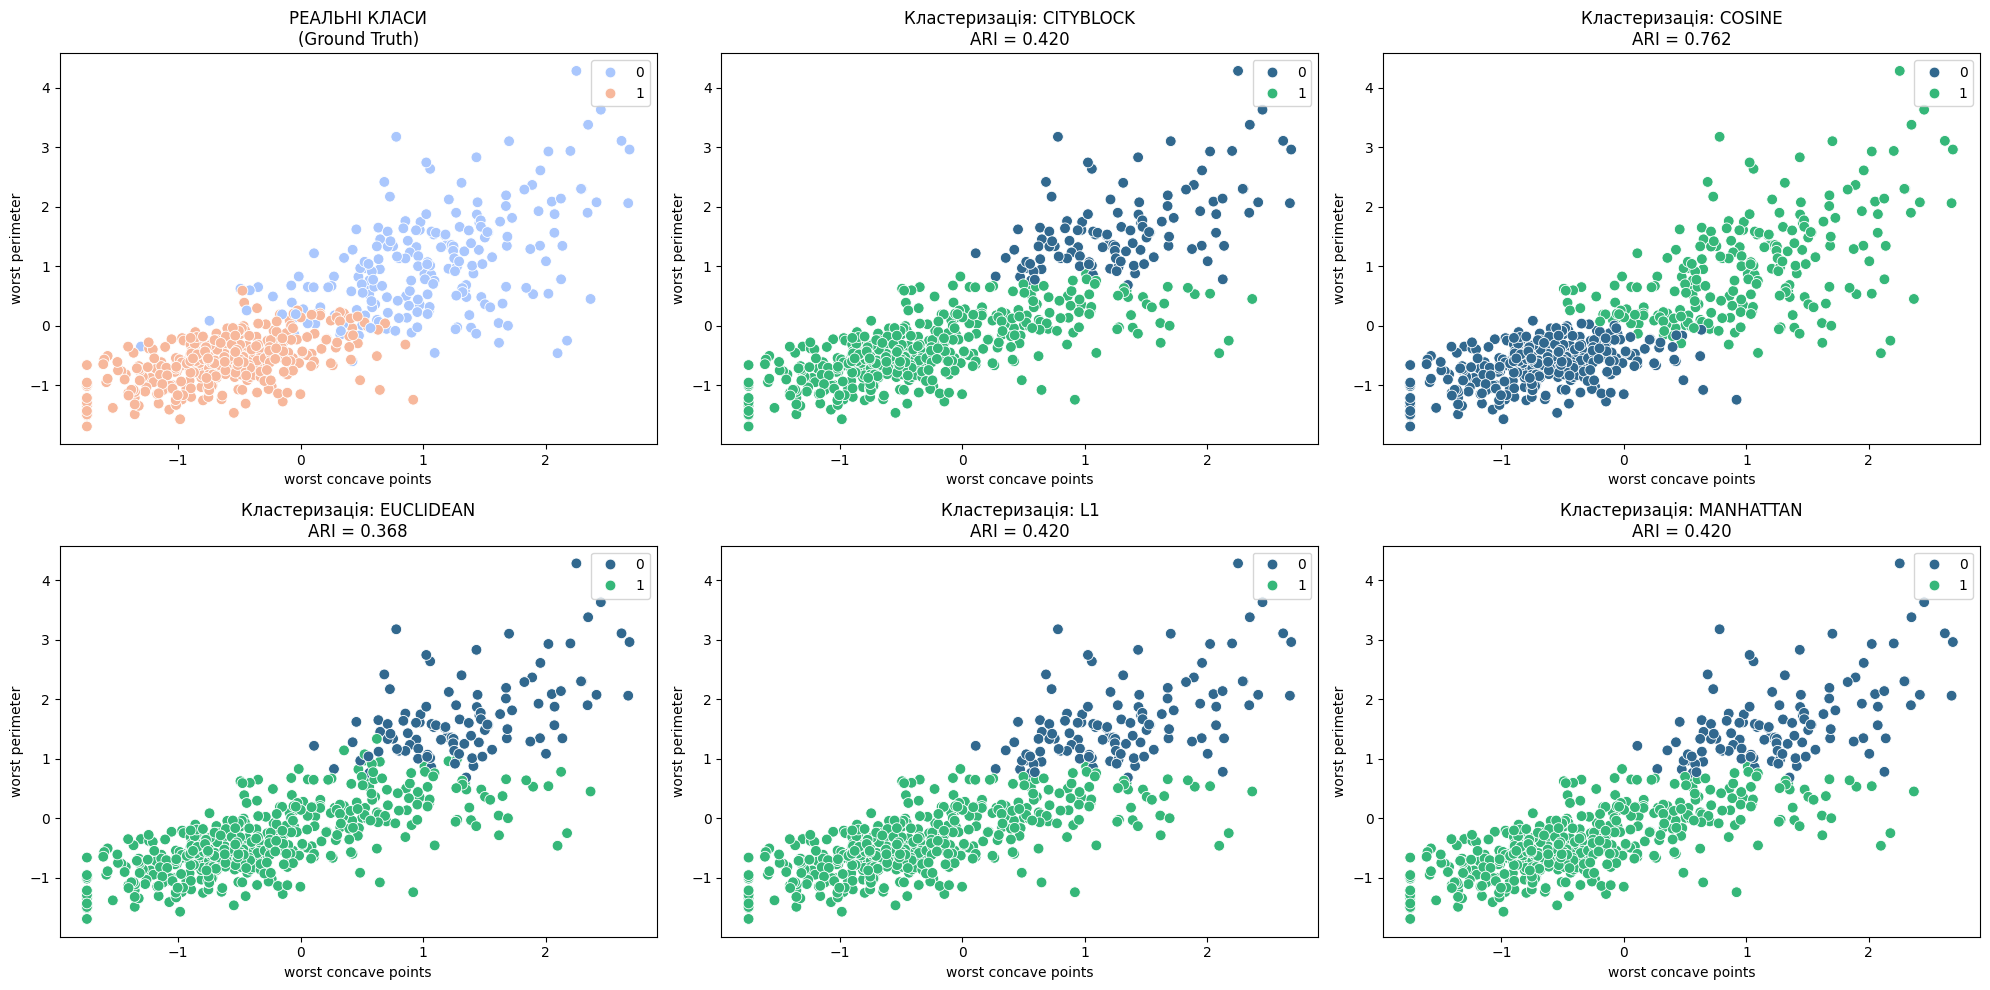

In [32]:
# Обираємо дві перші ознаки для осей графіка (з нашого списку top_5_features)
x_axis = top_5_features[0]
y_axis = top_5_features[1]

plt.figure(figsize=(20, 10))

# Додаємо справжній true_labels розподіл для порівняння
plt.subplot(2, 3, 1)
sns.scatterplot(data=df_scaled, x=x_axis, y=y_axis, hue=true_labels, palette='coolwarm', s=60)
plt.title(f"РЕАЛЬНІ КЛАСИ\n(Ground Truth)")

# Будуємо графіки для кожної метрики
for i, metric in enumerate(metrics_list, 2):
    dist = pairwise_distances(data_top_5, metric=metric)
    model = AgglomerativeClustering(n_clusters=2, metric='precomputed', linkage='average')
    pred_labels = model.fit_predict(dist)

    plt.subplot(2, 3, i)
    sns.scatterplot(data=df_scaled, x=x_axis, y=y_axis, hue=pred_labels, palette='viridis', s=60)
    plt.title(f"Кластеризація: {metric.upper()}\nARI = {ari_results[metric]:.3f}")

plt.tight_layout()
plt.show()

## Висновки

Стандартизація даних є критичним етапом. Стандартизація та відбір ознак за кореляцією дозволили виділити найважливіші біомаркери, що суттєво спростило структуру даних і дозволила всім 30 ознакам однаково впливати на розрахунок відстаней.

Замість аналізу всіх 30 параметрів, ми відібрали Топ-5 ознак з найвищою кореляцією до діагнозу.

Це дозволило очистити дані від "шуму".

Візуалізація через pairplot для цих ознак чітко показала лінійну роздільність класів.

Проведений аналіз продемонстрував, що вибір метрики відстані критично впливає на якість кластеризації.


1. Найкращу ефективність показала Косинусна подібність (ARI = 0.7621). Це доводить, що для діагностики раку грудей напрямок вектора є більш інформативним, ніж абсолютна відстань між точками. Графік кластеризації за Cosine найбільш точно відтворив реальну картину розподілу пацієнтів (Ground Truth).

2. Манхеттенська група (Cityblock, L1, Manhattan) — ARI = 0.4204.
Ці три метрики дали ідентичний результат, оскільки це одна й та сама математична логіка.

3. Евклідова відстань (Euclidean) — найслабша (ARI = 0.3677)

Результати підтверджують, що для задач медичної класифікації не існує універсальної метрики, і попередній аналіз (як-от розрахунок ARI) є необхідним етапом побудови моделі.